In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time

from libworm.model.beta_neuron import NeuronNetwork, from_connectome
from libworm.data import connectomes, traces
from libworm import preprocess
from libworm.functions import set_neurons, tcalc_s_inf, set_trace
from libworm.data.neuron import full_sensory_list

import json

from math import tau

In [2]:
with open("rust/results/d_bio_sens_dt_00001.json", "r") as file:
    small = np.array(json.load(file))

with open("rust/results/d_bio_sens_dt_001.json", "r") as file:
    med = np.array(json.load(file))

with open("rust/results/d_bio_sens_dt_01.json", "r") as file:
    large = np.array(json.load(file))

with open("rust/results/d_bio_sens_dt_1.json", "r") as file:
    huge = np.array(json.load(file))

with open("rust/processed_data/sensory_indices.json", "r") as file:
    sensory_indices = json.load(file)

datas = [small, med, large, huge]

In [14]:
def side_comp(datas, count = 32, per = 8, stride=1, ymin=-50, ymax=5):

    rows = int(np.ceil(count / per))

    fig, axs = plt.subplots(ncols=len(datas), nrows=rows, figsize=(5*12, 5*12))

    for ax in axs.flatten().tolist():
        ax.set_ylim([ymin, ymax])

    ax_index = -1
    
    # Voltage time curves
    for i in range(count):
        if i % per == 0:
            ax_index += 1
        for j, data in enumerate(datas): 
            if i in sensory_indices:
                axs[ax_index, j].plot(data[::stride, i], label=f'V_m_{i}', marker='^')
            else:
                axs[ax_index, j].plot(data[::stride, i], label=f'V_m_{i}')
            
        
    plt.show()

In [7]:
def show_large_voltage_data(data, count = None, per = 8.0, stride=1):
    
    if count is None:
        pass
    else:
        data = data[:, :count]

    size = int(np.ceil(np.sqrt(data.shape[1] / per)))

    fig, axs = plt.subplots(ncols=size, nrows=size, figsize=(5*12, 5*12))

    ax_index = -1
    
    # Voltage time curves
    for i in range(data.shape[1]):
        if i % per == 0:
            ax_index += 1

        if i in sensory_indices:
            axs[ax_index // size, ax_index % size].plot(data[::stride, i], label=f'V_m_{i}', marker='^')
        else:
            axs[ax_index // size, ax_index % size].plot(data[::stride, i], label=f'V_m_{i}')
        
        
    plt.show()

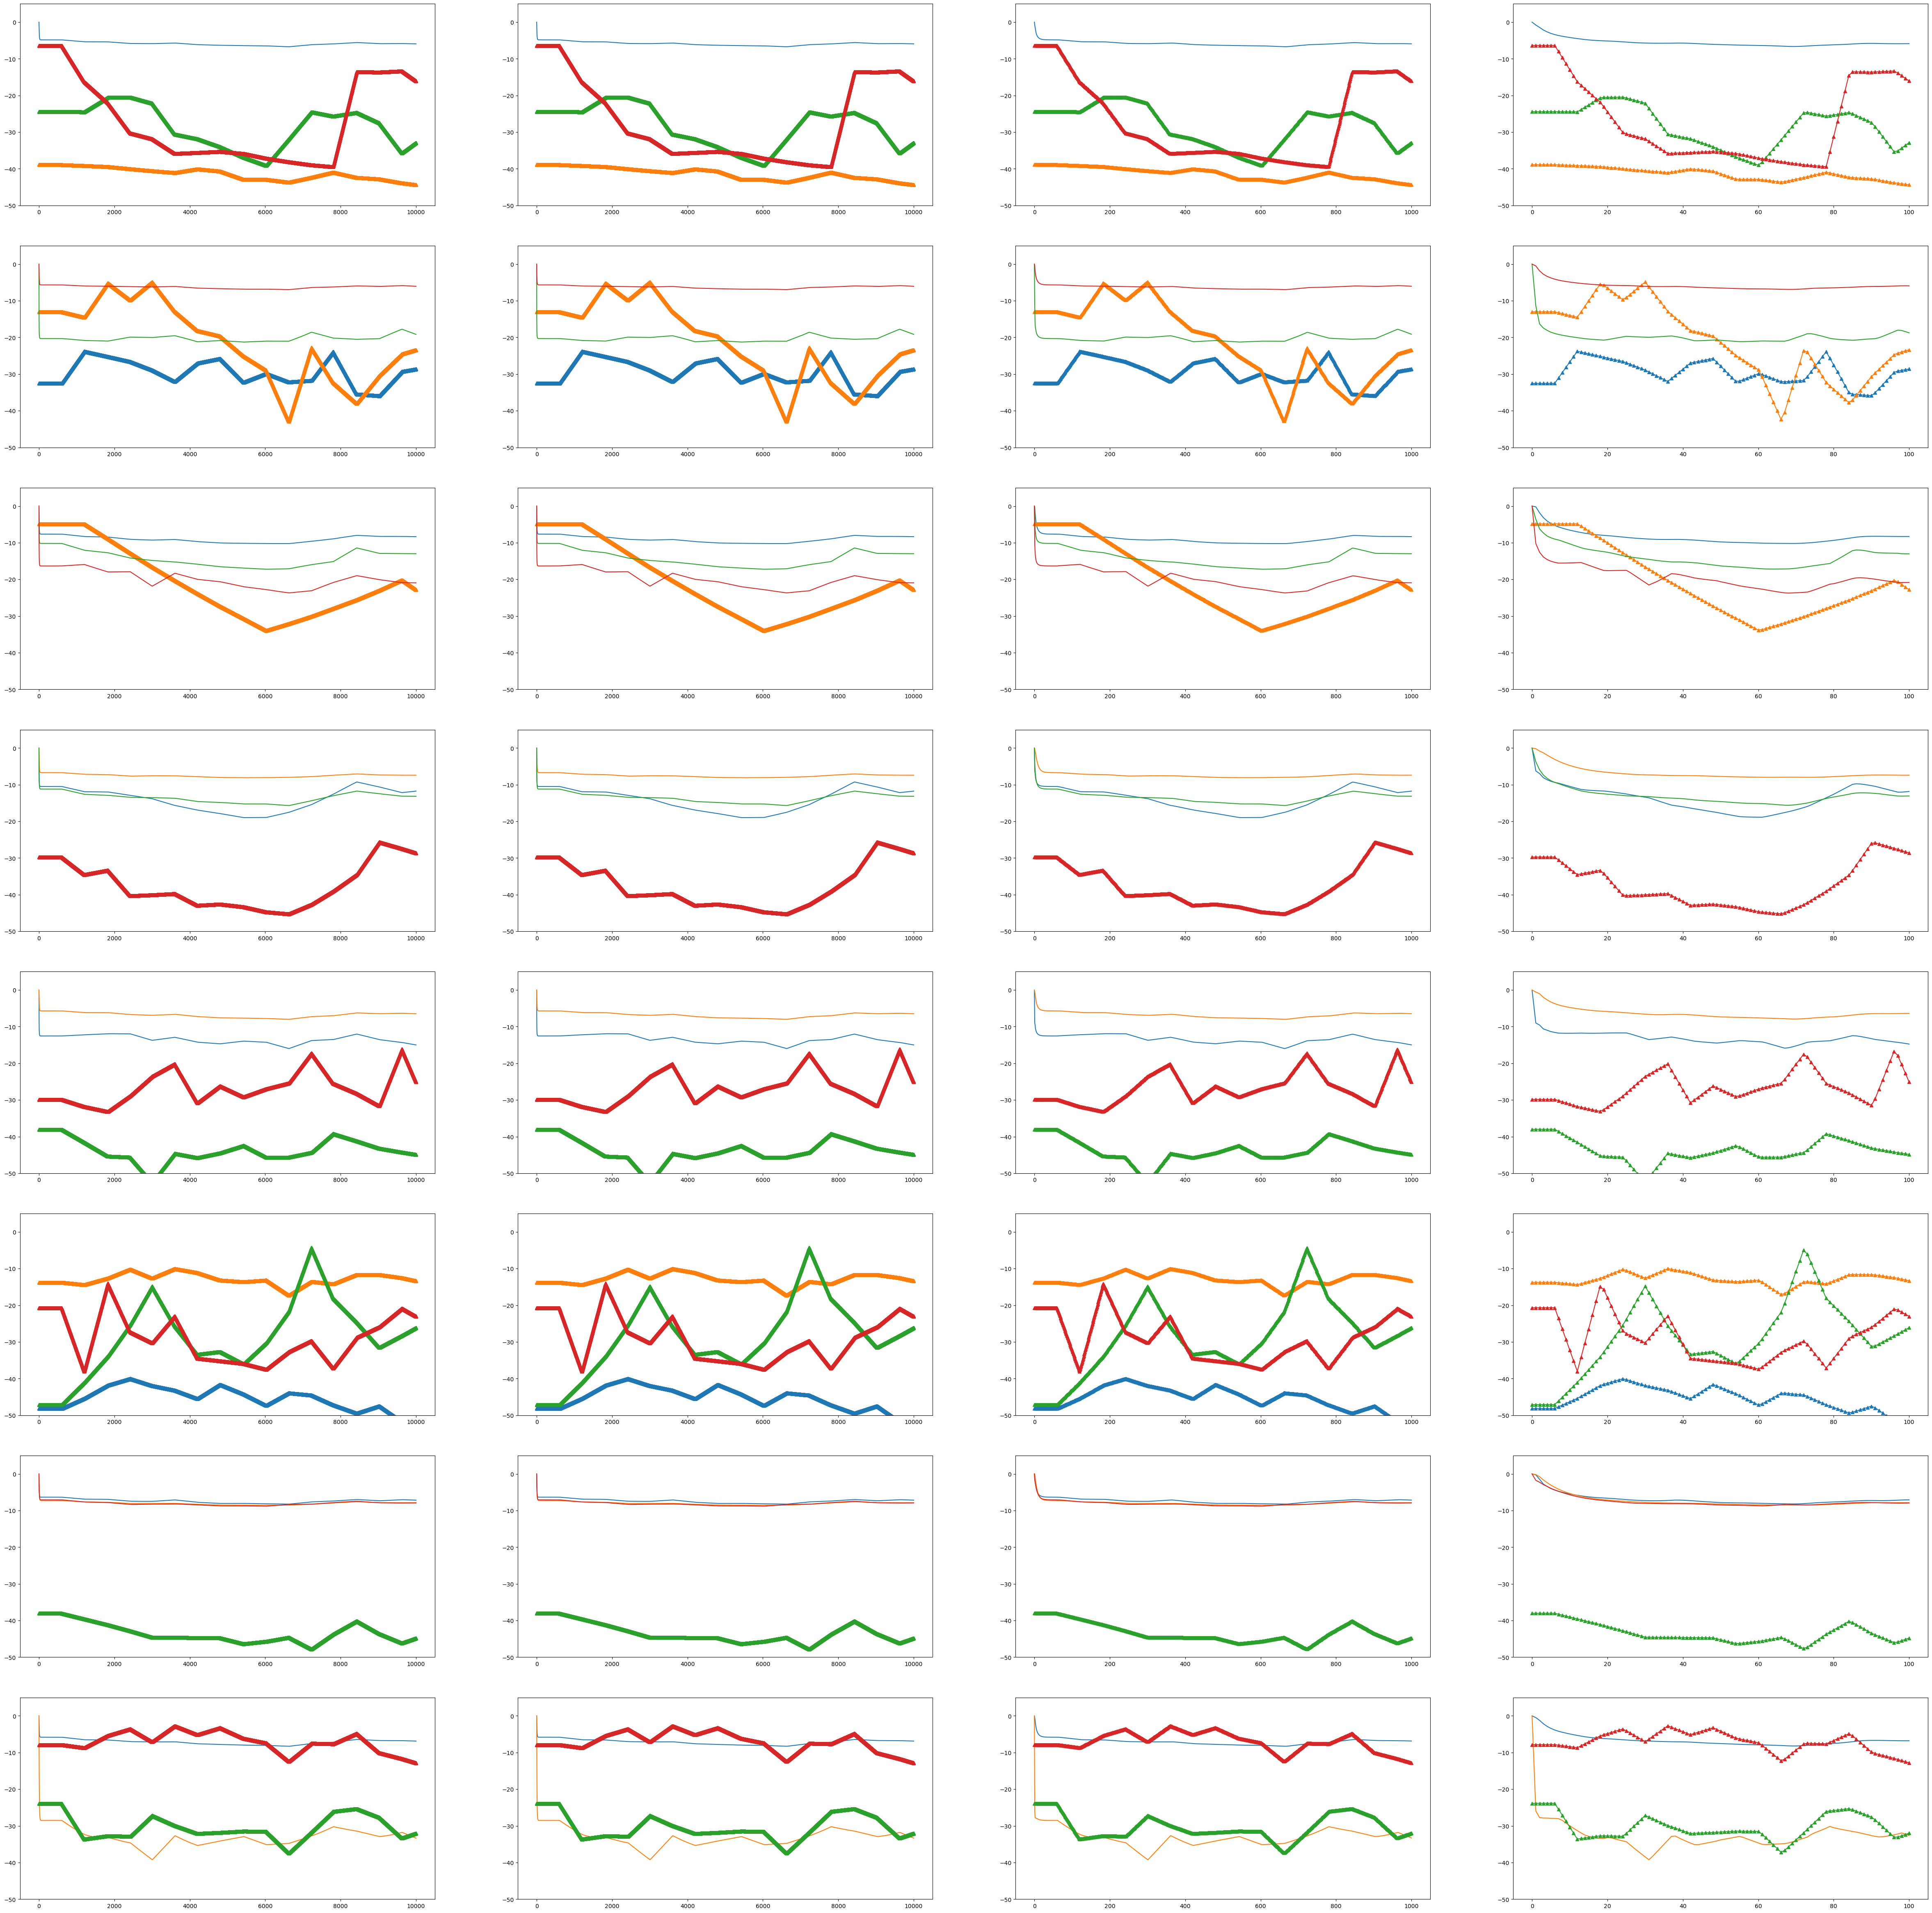

In [16]:
side_comp(datas, per=4)

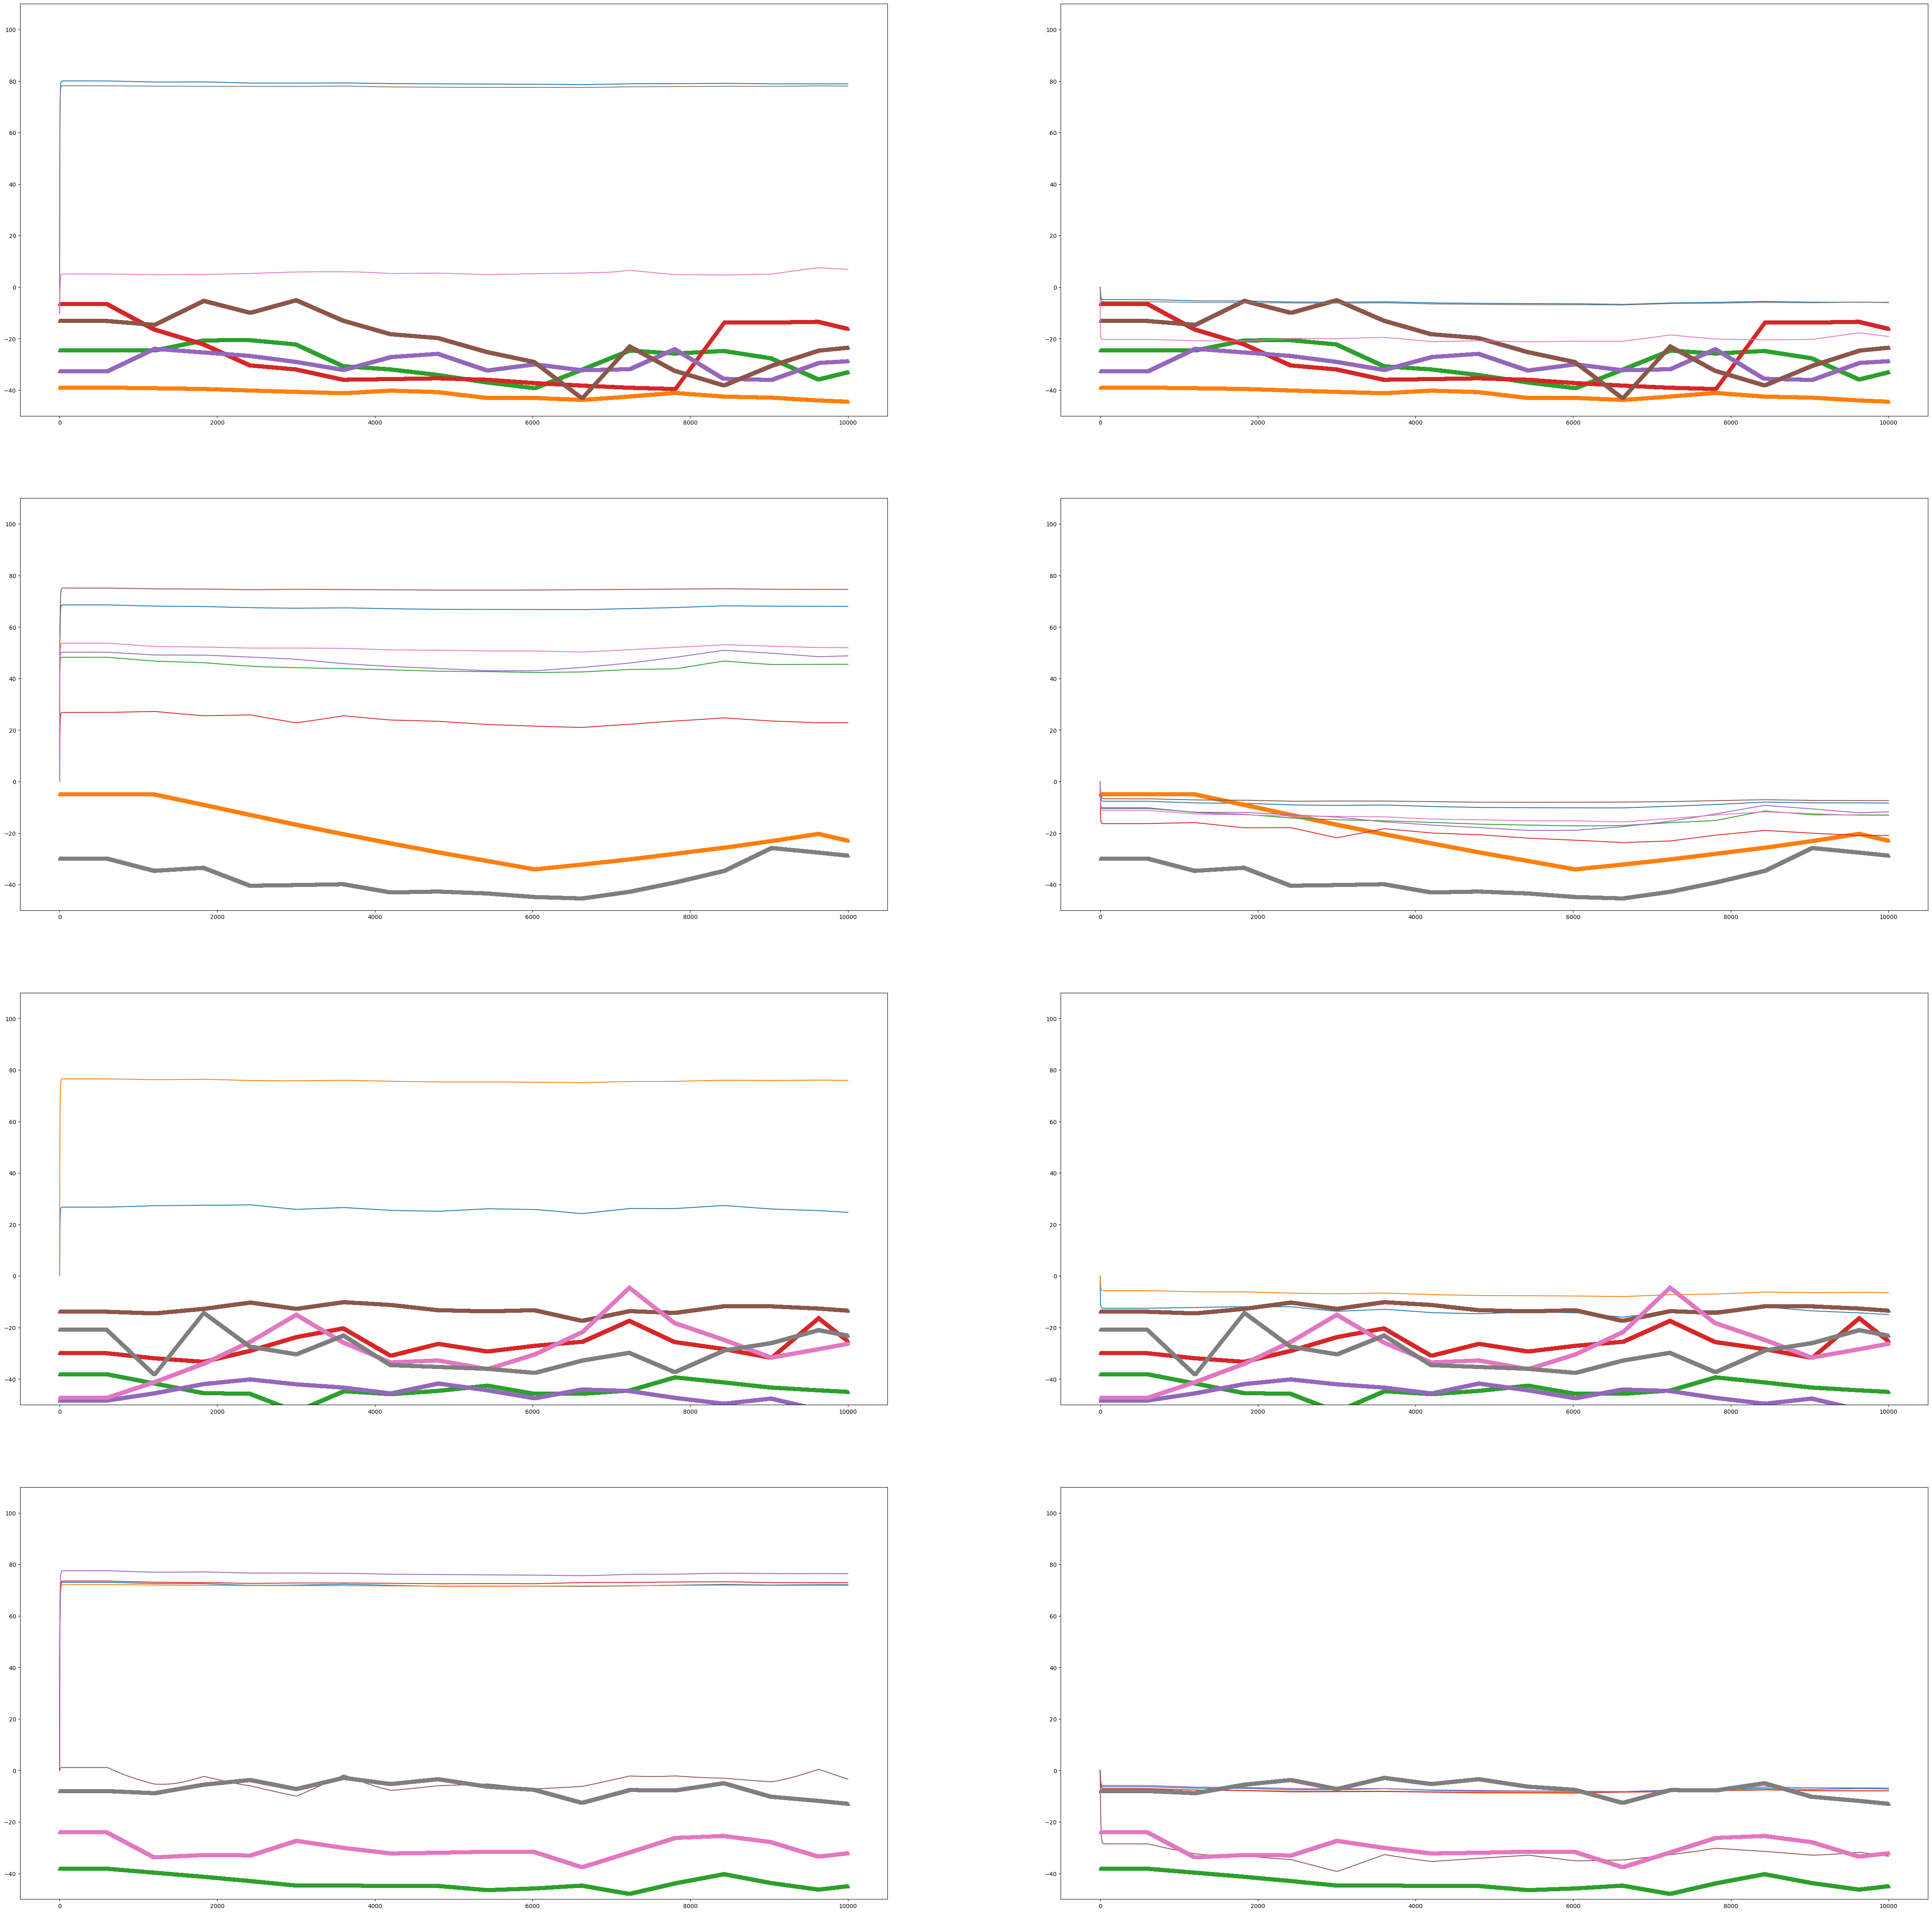

In [17]:
with open("rust/results/dp_bio_sens_dt_00001_new.json", "r") as file:
    data = np.array(json.load(file))

side_comp([data, small], ymax=110)